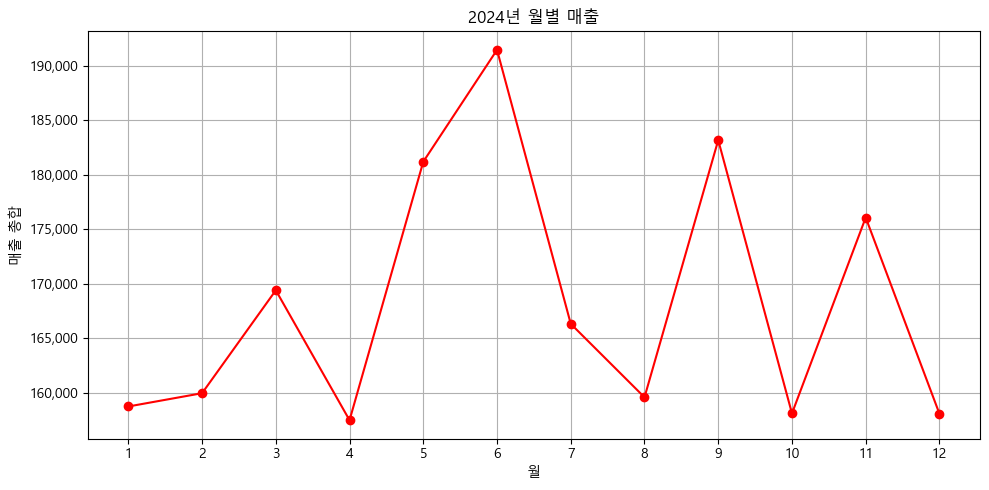

In [2]:
import pandas as pd  # 표 형태 데이터 처리하기 위함
import numpy as np  # 숫자 관련 계산, 랜덤 값 만들 때 사용
import matplotlib.pyplot as plt  # 그래프 그리기용 라이브러리
import matplotlib.ticker as ticker  # y축 숫자 180,000처럼 쉼표 넣으려고 했습니다.

class SalesAnalysis:
    def __init__(self):
        # 날짜 생성하기. 2024년 1월 1일부터 12월 31일까지 하루 단위
        self.dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

        # 1000~10000 사이의 숫자를 랜덤으로 뽑아서 하루 매출로 사용 (총 365개)
        self.sales = np.random.randint(1000, 10001, size=len(self.dates))

        # 날짜와 매출을 데이터프레임 형태로 저장
        self.df = pd.DataFrame({'날짜': self.dates, '매출': self.sales})

        # 월 컬럼 추가 (날짜에서 월만 따로 뽑아내기)
        self.df['월'] = self.df['날짜'].dt.month

    def plot_monthly_sales(self):
        # 월별로 매출 합계를 구함 (groupby는 같은 월끼리 묶어서 계산)
        monthly_sales = self.df.groupby('월')['매출'].sum()

        # 한글 폰트로 설정
        plt.rcParams['font.family'] = 'Malgun Gothic'

        # 그래프 그리기
        plt.figure(figsize=(10, 5))  # 가로 10, 세로 5 크기로 설정
        plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='red')

        # 그래프 제목과 축 라벨 설정
        plt.title('2024년 월별 매출')
        plt.xlabel('월')
        plt.ylabel('매출 총합')

        # y축 숫자에 천 단위 쉼표 찍기 (예: 180,000)
        plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

        # 눈금과 그리드 설정
        plt.xticks(range(1, 13))  # x축을 1월~12월로 설정
        plt.grid(True)

        # 그래프 레이아웃 자동 조정
        plt.tight_layout()
        plt.show()

# 메인 실행 부분
if __name__ == '__main__':
    all = SalesAnalysis()         # 클래스 객체 생성
    all.plot_monthly_sales()     # 그래프 출력 함수 실행
